# Initial Data Exploration for Covid19 pandemic in Malaysia

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|Date |Date of incident	|
|Province/State |If there is a breakdown in states	|
|Lat |Latitude	|
|Lon |Longitude	|
|Confirmed |Confirmed cases	|
|Recovered |Recovered cases	|
|Deaths |Death cases	|
|Active |Active cases	|

## Analysis Summary

1. From worldwide perspective, the confirmed cases are the highest range and many outliers found in boxplot.

2. This analysis and machine learning model will predict COVID-19 deaths in Malaysia.

3. From time plots, the biggest jump is from October 2020 onwards.

4. By extracting individual cases by day, deaths peaked in April 2020 and October 2020 onwards.

5. Separate charts by Month and Day are plotted to see the distribution.

## Feature Engineering

1. The dataset is transformed using diff method to extract per day for Confirmed, Recovered, Deaths and Active Cases.

2. Due to diff method, I imputed a NaN value as 0.0 as starting point.

3. Created separate month and day features from Date feature.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("covid_19_data_cleaned.csv",parse_dates=['Date'], index_col=["Date"])

In [3]:
df

,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
Date,,,,,,,,
2020-01-22,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
2020-01-23,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
2020-01-24,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
2020-01-25,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
2020-01-26,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
...,...,...,...,...,...,...,...,...
2020-11-21,NaN,Timor-Leste,-8.87420,125.727500,0,30,0,-30
2020-11-22,NaN,Timor-Leste,-8.87420,125.727500,0,30,0,-30
2020-11-23,NaN,Timor-Leste,-8.87420,125.727500,0,30,0,-30


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85593 entries, 2020-01-22 to 2020-11-25
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  26265 non-null  object 
 1   Country         85593 non-null  object 
 2   Lat             85593 non-null  float64
 3   Long            85593 non-null  float64
 4   Confirmed       85593 non-null  int64  
 5   Recovered       85593 non-null  int64  
 6   Deaths          85593 non-null  int64  
 7   Active          85593 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 5.9+ MB


In [5]:
df.describe()

,Lat,Long,Confirmed,Recovered,Deaths,Active
count,85593.000000,85593.000000,8.559300e+04,8.559300e+04,85593.000000,8.559300e+04
mean,20.916828,24.585736,5.867697e+04,3.708964e+04,1926.112906,1.966121e+04
std,25.065486,71.663375,4.359217e+05,2.917598e+05,11981.062356,1.936343e+05
min,-51.796300,-135.000000,0.000000e+00,0.000000e+00,0.000000,-2.818830e+05
25%,6.423800,-15.180400,1.600000e+01,0.000000e+00,0.000000,1.000000e+00
50%,22.300000,21.745300,5.130000e+02,2.000000e+02,6.000000,6.800000e+01
75%,41.112900,85.240100,6.442000e+03,2.913000e+03,118.000000,1.667000e+03
max,71.706900,178.065000,1.277265e+07,8.679138e+06,262222.000000,7.674475e+06


In [6]:
df.columns

Index(['Province/State', 'Country', 'Lat', 'Long', 'Confirmed', 'Recovered', 'Deaths', 'Active'], dtype='object')

In [7]:
df["Country"].value_counts()

China                       10815
Canada                       5253
France                       3399
United Kingdom               3399
Australia                    2472
                            ...  
Angola                        309
Chile                         309
Central African Republic      309
Poland                        309
Malawi                        309
Name: Country, Length: 191, dtype: int64

In [8]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [9]:
df["Country"].nunique()

191

## Data Visualization (Part 1)

### Univariate Data Exploration

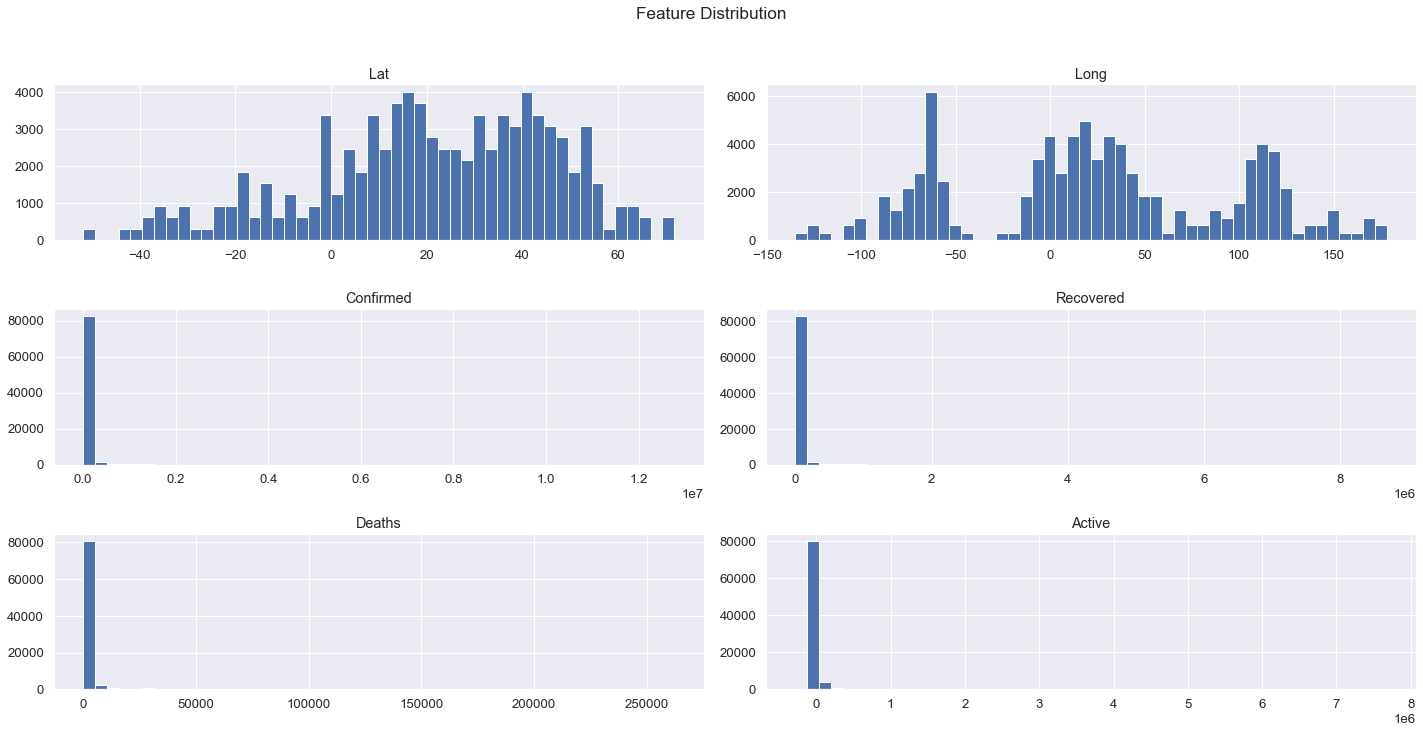

In [10]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

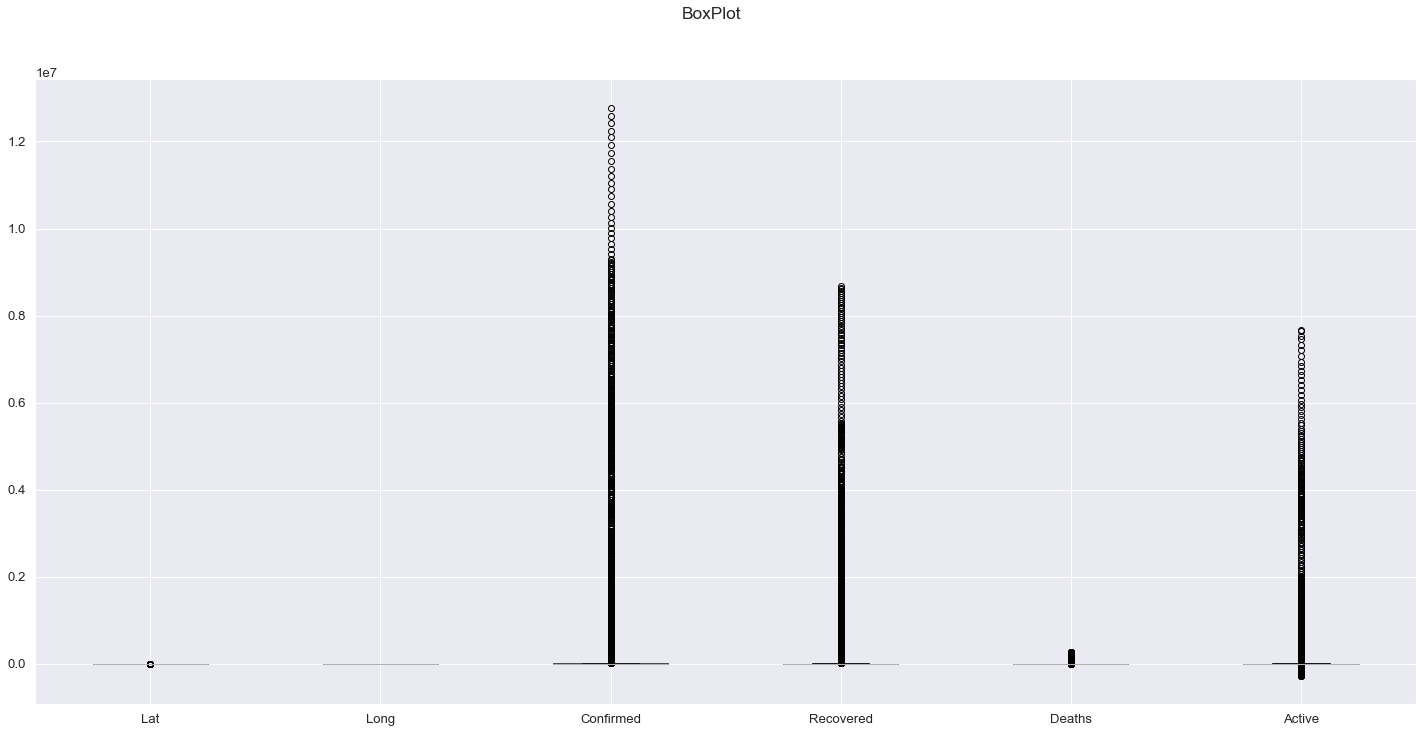

In [11]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Extract country Malaysia from dataset for analysis and machine learning

In [12]:
malaysia = df[df["Country"] == "Malaysia"]

In [13]:
malaysia

,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
Date,,,,,,,,
2020-01-22,NaN,Malaysia,4.210484,101.975766,0,0,0,0
2020-01-23,NaN,Malaysia,4.210484,101.975766,0,0,0,0
2020-01-24,NaN,Malaysia,4.210484,101.975766,0,0,0,0
2020-01-25,NaN,Malaysia,4.210484,101.975766,3,0,0,3
2020-01-26,NaN,Malaysia,4.210484,101.975766,4,0,0,4
...,...,...,...,...,...,...,...,...
2020-11-21,NaN,Malaysia,4.210484,101.975766,53679,40493,332,12854
2020-11-22,NaN,Malaysia,4.210484,101.975766,54775,41597,335,12843
2020-11-23,NaN,Malaysia,4.210484,101.975766,56659,42480,337,13842


### Drop unwanted features

In [14]:
malaysia.columns

Index(['Province/State', 'Country', 'Lat', 'Long', 'Confirmed', 'Recovered', 'Deaths', 'Active'], dtype='object')

In [15]:
malaysia.drop(['Province/State', 'Country', 'Lat', 'Long'],axis=1,inplace=True)

In [16]:
malaysia

,Confirmed,Recovered,Deaths,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,3,0,0,3
2020-01-26,4,0,0,4
...,...,...,...,...
2020-11-21,53679,40493,332,12854
2020-11-22,54775,41597,335,12843
2020-11-23,56659,42480,337,13842


In [17]:
malaysia.reset_index(inplace=True)

In [18]:
#Save to csv
#malaysia.to_csv("malaysiacovid.csv",index=False)

### Time-Series Analysis

In [19]:
df = pd.read_csv("malaysiacovid.csv", parse_dates=["Date"])

In [20]:
df

,Date,Confirmed,Recovered,Deaths,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,3,0,0,3
4,2020-01-26,4,0,0,4
...,...,...,...,...,...
304,2020-11-21,53679,40493,332,12854
305,2020-11-22,54775,41597,335,12843
306,2020-11-23,56659,42480,337,13842
307,2020-11-24,58847,44153,341,14353


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       309 non-null    datetime64[ns]
 1   Confirmed  309 non-null    int64         
 2   Recovered  309 non-null    int64         
 3   Deaths     309 non-null    int64         
 4   Active     309 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.2 KB


In [22]:
df.set_index(["Date"],inplace=True)

In [23]:
df

,Confirmed,Recovered,Deaths,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,3,0,0,3
2020-01-26,4,0,0,4
...,...,...,...,...
2020-11-21,53679,40493,332,12854
2020-11-22,54775,41597,335,12843
2020-11-23,56659,42480,337,13842


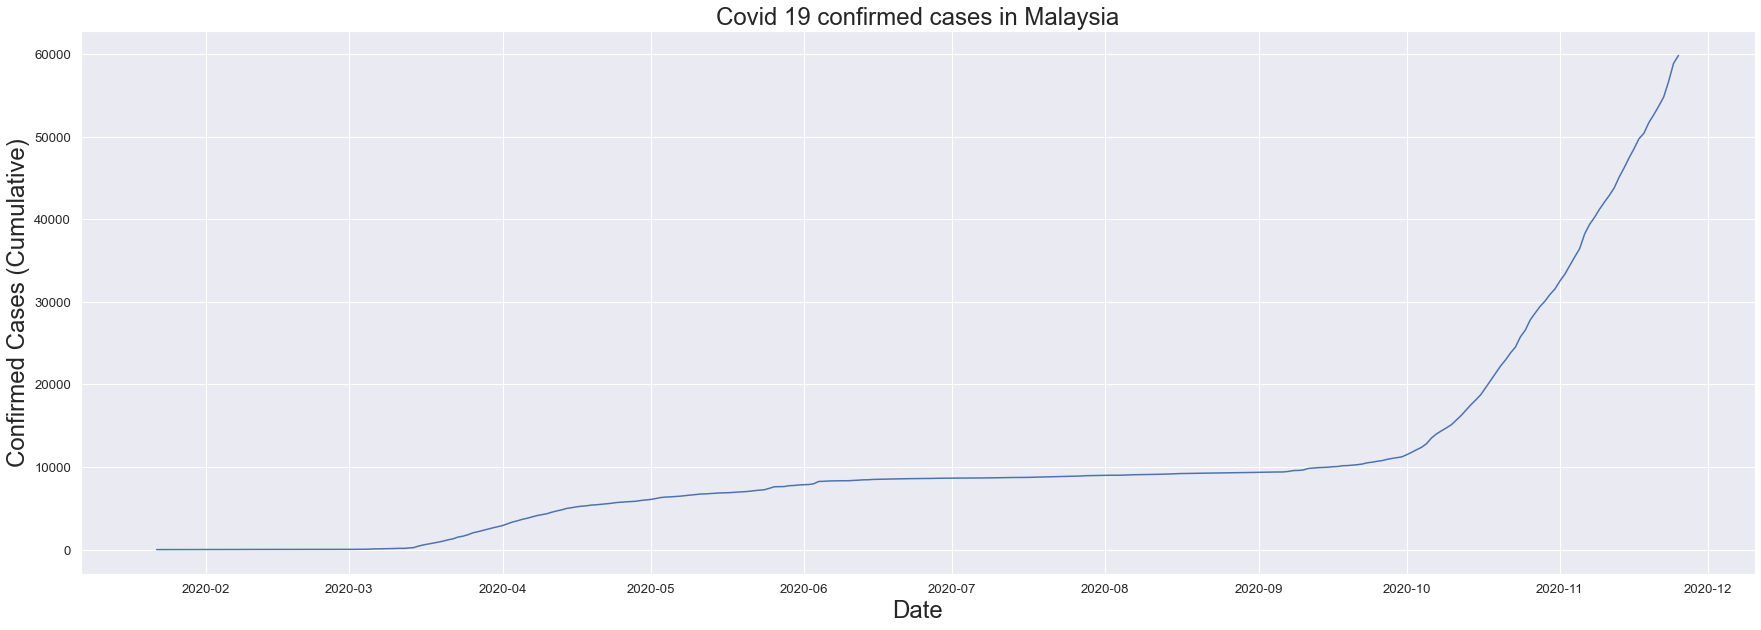

In [24]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.index,y=df.Confirmed,data=df, estimator=None)
plt.title("Covid 19 confirmed cases in Malaysia", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Confirmed Cases (Cumulative)",fontsize=24)
plt.show()

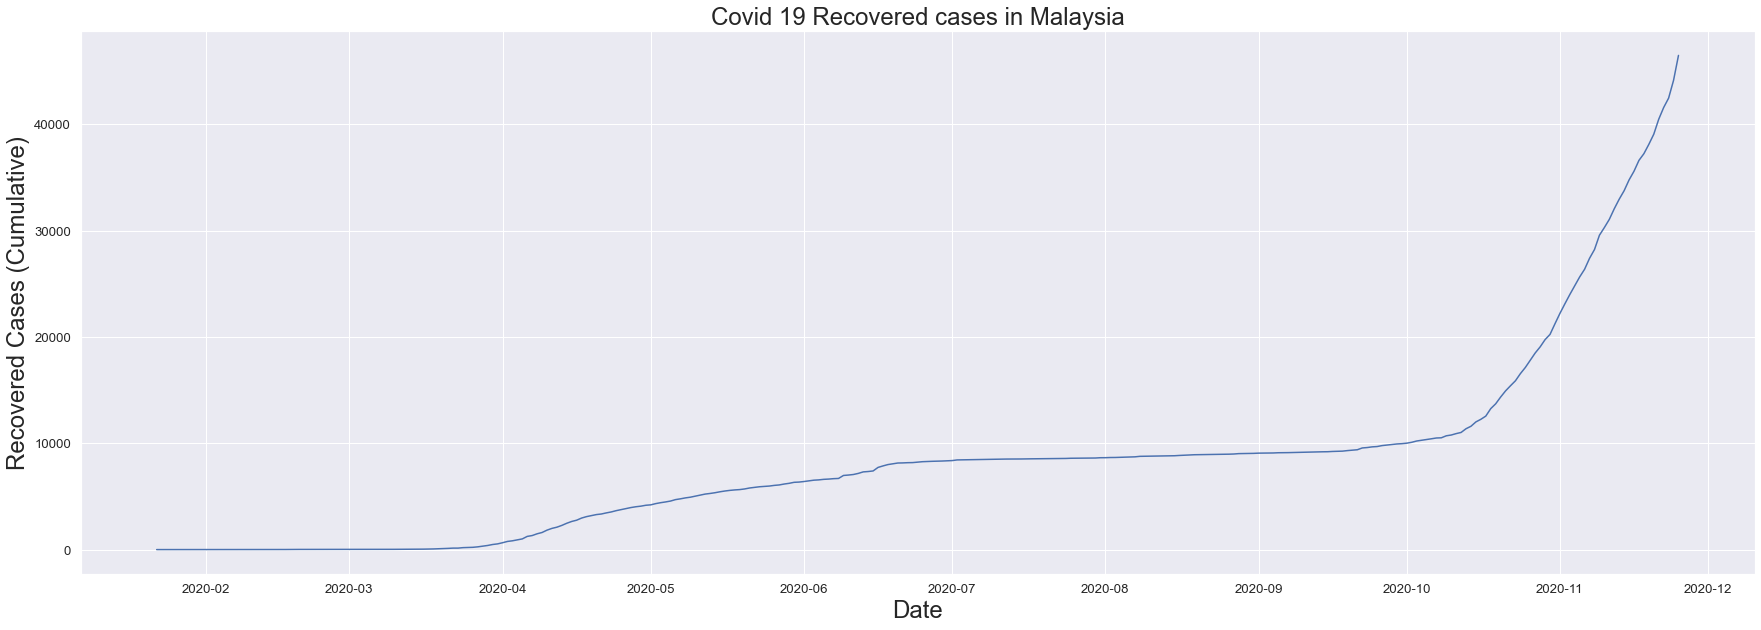

In [25]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.index,y=df.Recovered,data=df, estimator=None)
plt.title("Covid 19 Recovered cases in Malaysia", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Recovered Cases (Cumulative)",fontsize=24)
plt.show()

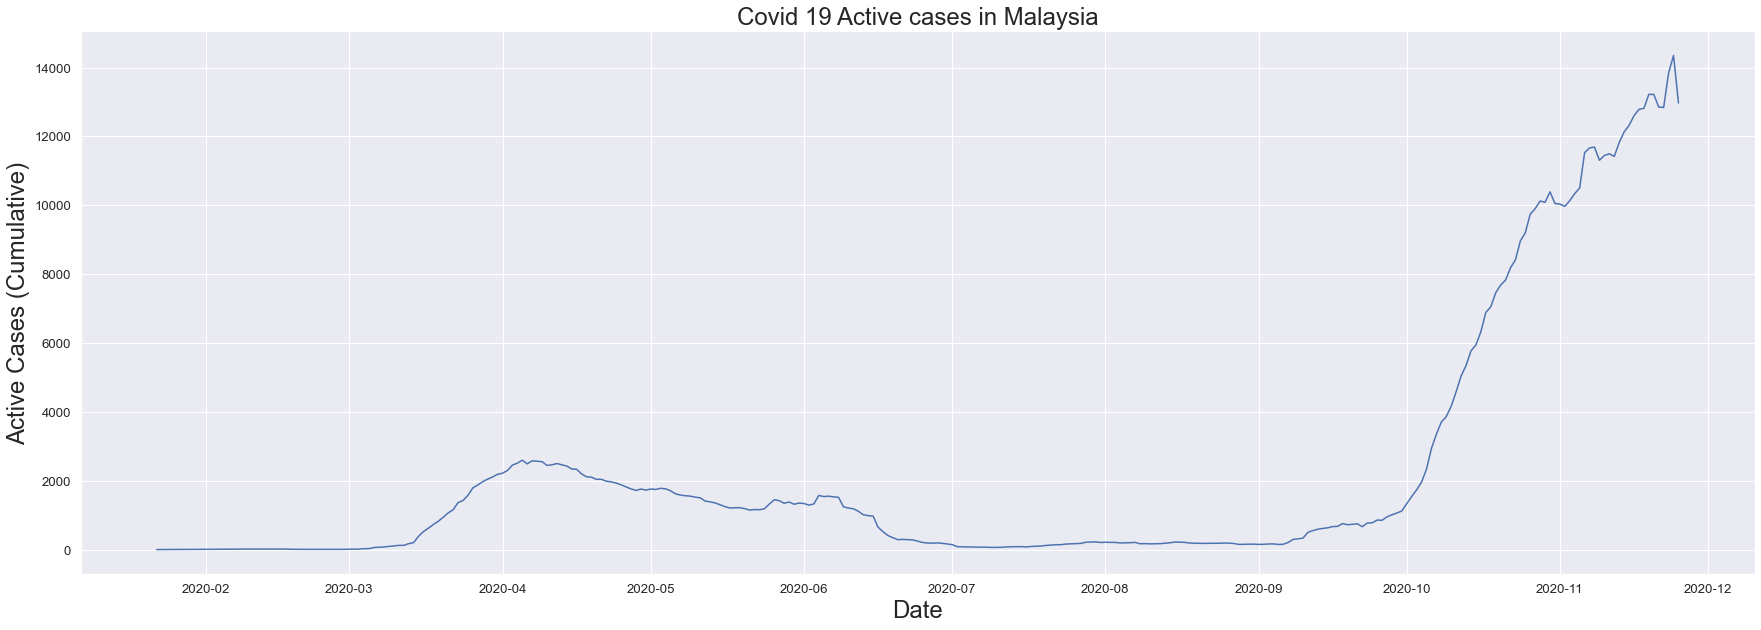

In [26]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.index,y=df.Active,data=df, estimator=None)
plt.title("Covid 19 Active cases in Malaysia", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Active Cases (Cumulative)",fontsize=24)
plt.show()

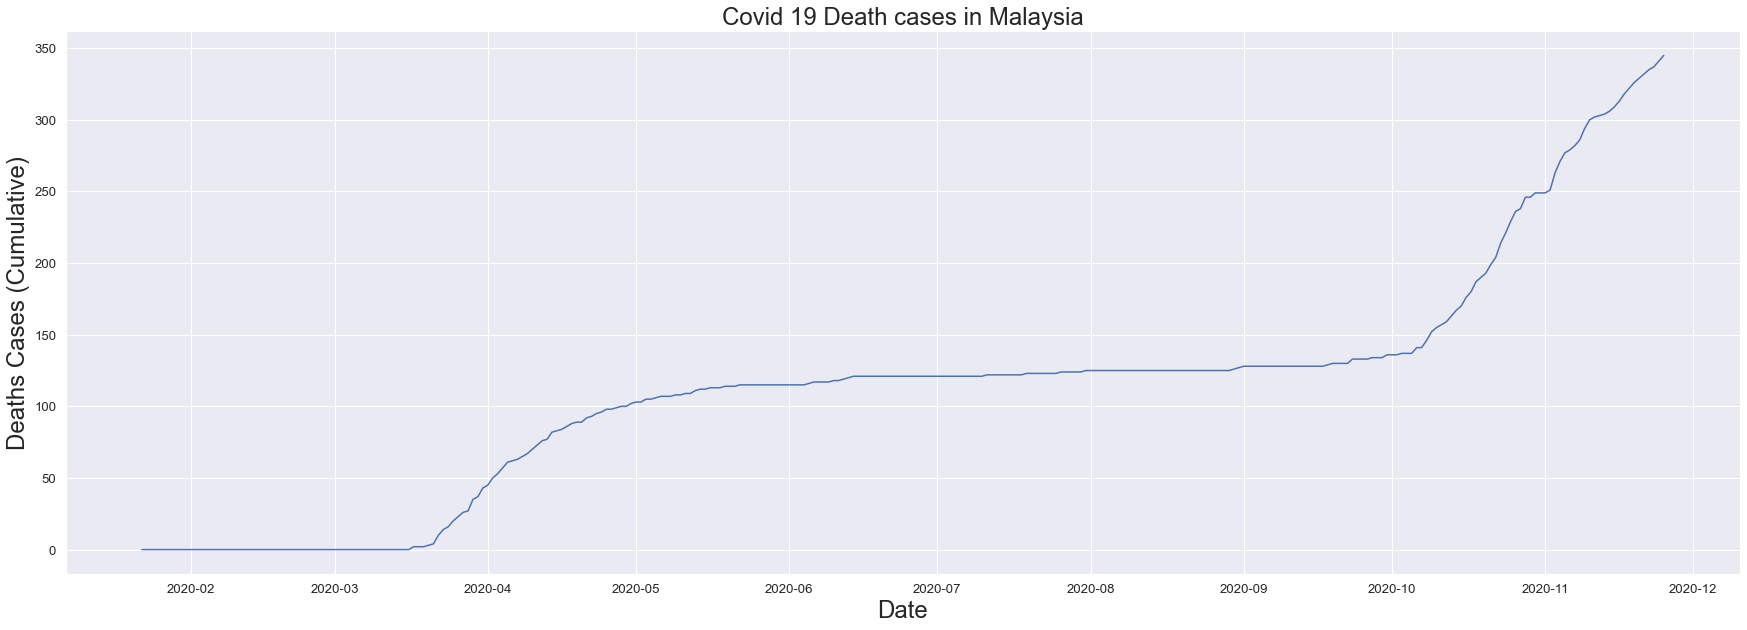

In [27]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.index,y=df.Deaths,data=df, estimator=None)
plt.title("Covid 19 Death cases in Malaysia", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Deaths Cases (Cumulative)",fontsize=24)
plt.show()

In [28]:
df.head()

,Confirmed,Recovered,Deaths,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,3,0,0,3
2020-01-26,4,0,0,4


In [29]:
df["ConfirmDiff"] = df["Confirmed"].diff()

In [30]:
df["DeathsDiff"] = df["Deaths"].diff()

In [31]:
df["RecoverDiff"] = df["Recovered"].diff()

In [32]:
df["ActiveDiff"] = df["Active"].diff()

In [33]:
df

,Confirmed,Recovered,Deaths,Active,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff
Date,,,,,,,,
2020-01-22,0,0,0,0,NaN,NaN,NaN,NaN
2020-01-23,0,0,0,0,0.0,0.0,0.0,0.0
2020-01-24,0,0,0,0,0.0,0.0,0.0,0.0
2020-01-25,3,0,0,3,3.0,0.0,0.0,3.0
2020-01-26,4,0,0,4,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2020-11-21,53679,40493,332,12854,1041.0,3.0,1405.0,-367.0
2020-11-22,54775,41597,335,12843,1096.0,3.0,1104.0,-11.0
2020-11-23,56659,42480,337,13842,1884.0,2.0,883.0,999.0


In [34]:
df.reset_index(inplace=True)

In [35]:
df

,Date,Confirmed,Recovered,Deaths,Active,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff
0,2020-01-22,0,0,0,0,NaN,NaN,NaN,NaN
1,2020-01-23,0,0,0,0,0.0,0.0,0.0,0.0
2,2020-01-24,0,0,0,0,0.0,0.0,0.0,0.0
3,2020-01-25,3,0,0,3,3.0,0.0,0.0,3.0
4,2020-01-26,4,0,0,4,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
304,2020-11-21,53679,40493,332,12854,1041.0,3.0,1405.0,-367.0
305,2020-11-22,54775,41597,335,12843,1096.0,3.0,1104.0,-11.0
306,2020-11-23,56659,42480,337,13842,1884.0,2.0,883.0,999.0
307,2020-11-24,58847,44153,341,14353,2188.0,4.0,1673.0,511.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         309 non-null    datetime64[ns]
 1   Confirmed    309 non-null    int64         
 2   Recovered    309 non-null    int64         
 3   Deaths       309 non-null    int64         
 4   Active       309 non-null    int64         
 5   ConfirmDiff  308 non-null    float64       
 6   DeathsDiff   308 non-null    float64       
 7   RecoverDiff  308 non-null    float64       
 8   ActiveDiff   308 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 21.9 KB


In [37]:
df.replace(to_replace=np.nan, value=0.0, inplace=True)

In [38]:
df

,Date,Confirmed,Recovered,Deaths,Active,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff
0,2020-01-22,0,0,0,0,0.0,0.0,0.0,0.0
1,2020-01-23,0,0,0,0,0.0,0.0,0.0,0.0
2,2020-01-24,0,0,0,0,0.0,0.0,0.0,0.0
3,2020-01-25,3,0,0,3,3.0,0.0,0.0,3.0
4,2020-01-26,4,0,0,4,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
304,2020-11-21,53679,40493,332,12854,1041.0,3.0,1405.0,-367.0
305,2020-11-22,54775,41597,335,12843,1096.0,3.0,1104.0,-11.0
306,2020-11-23,56659,42480,337,13842,1884.0,2.0,883.0,999.0
307,2020-11-24,58847,44153,341,14353,2188.0,4.0,1673.0,511.0


### Treat Missing Values

In [39]:
df.isnull().sum()

Date           0
Confirmed      0
Recovered      0
Deaths         0
Active         0
ConfirmDiff    0
DeathsDiff     0
RecoverDiff    0
ActiveDiff     0
dtype: int64

In [40]:
df["Month"] = df["Date"].dt.month

In [41]:
df["Day"] = df["Date"].dt.day

In [42]:
df

,Date,Confirmed,Recovered,Deaths,Active,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff,Month,Day
0,2020-01-22,0,0,0,0,0.0,0.0,0.0,0.0,1,22
1,2020-01-23,0,0,0,0,0.0,0.0,0.0,0.0,1,23
2,2020-01-24,0,0,0,0,0.0,0.0,0.0,0.0,1,24
3,2020-01-25,3,0,0,3,3.0,0.0,0.0,3.0,1,25
4,2020-01-26,4,0,0,4,1.0,0.0,0.0,1.0,1,26
...,...,...,...,...,...,...,...,...,...,...,...
304,2020-11-21,53679,40493,332,12854,1041.0,3.0,1405.0,-367.0,11,21
305,2020-11-22,54775,41597,335,12843,1096.0,3.0,1104.0,-11.0,11,22
306,2020-11-23,56659,42480,337,13842,1884.0,2.0,883.0,999.0,11,23
307,2020-11-24,58847,44153,341,14353,2188.0,4.0,1673.0,511.0,11,24


In [43]:
#Save to csv
#df.to_csv("malaysiacovid2.csv",index=False)

### Pairplots

<Figure size 1440x1440 with 0 Axes>

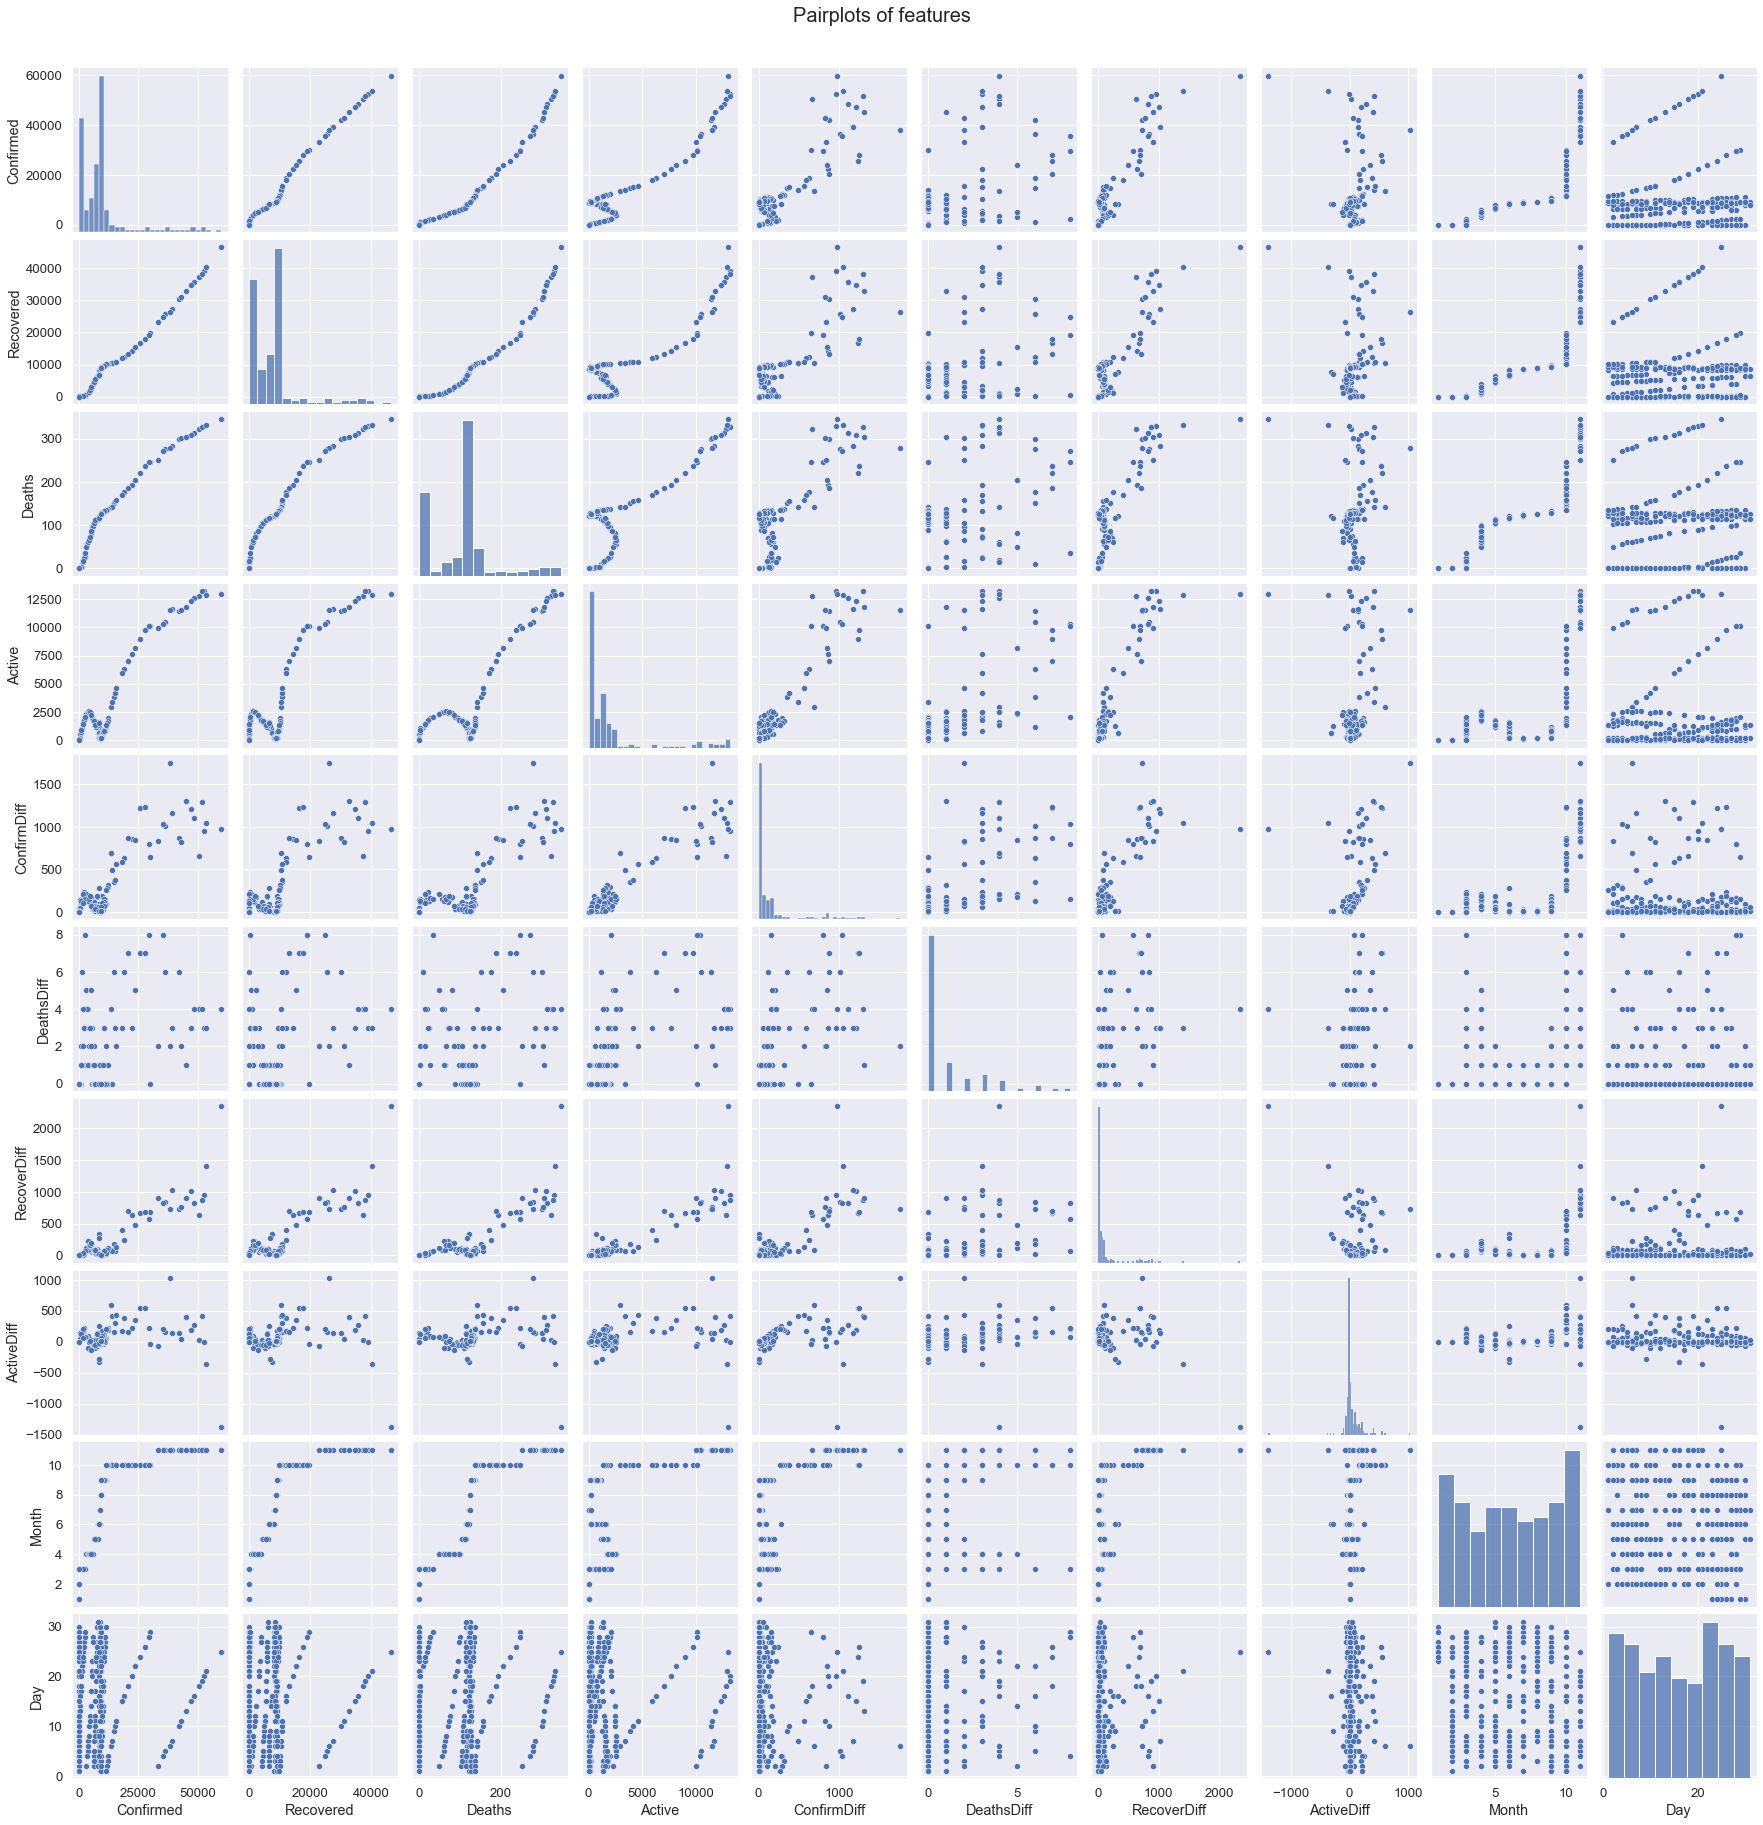

In [44]:
plt.figure(figsize=(20,20))
sns.pairplot(df.sample(200))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

## Data Visualization (Part 2)

In [45]:
df.head()

,Date,Confirmed,Recovered,Deaths,Active,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff,Month,Day
0,2020-01-22,0,0,0,0,0.0,0.0,0.0,0.0,1,22
1,2020-01-23,0,0,0,0,0.0,0.0,0.0,0.0,1,23
2,2020-01-24,0,0,0,0,0.0,0.0,0.0,0.0,1,24
3,2020-01-25,3,0,0,3,3.0,0.0,0.0,3.0,1,25
4,2020-01-26,4,0,0,4,1.0,0.0,0.0,1.0,1,26


In [46]:
df.set_index(["Date"],inplace=True)

In [47]:
df

,Confirmed,Recovered,Deaths,Active,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff,Month,Day
Date,,,,,,,,,,
2020-01-22,0,0,0,0,0.0,0.0,0.0,0.0,1,22
2020-01-23,0,0,0,0,0.0,0.0,0.0,0.0,1,23
2020-01-24,0,0,0,0,0.0,0.0,0.0,0.0,1,24
2020-01-25,3,0,0,3,3.0,0.0,0.0,3.0,1,25
2020-01-26,4,0,0,4,1.0,0.0,0.0,1.0,1,26
...,...,...,...,...,...,...,...,...,...,...
2020-11-21,53679,40493,332,12854,1041.0,3.0,1405.0,-367.0,11,21
2020-11-22,54775,41597,335,12843,1096.0,3.0,1104.0,-11.0,11,22
2020-11-23,56659,42480,337,13842,1884.0,2.0,883.0,999.0,11,23


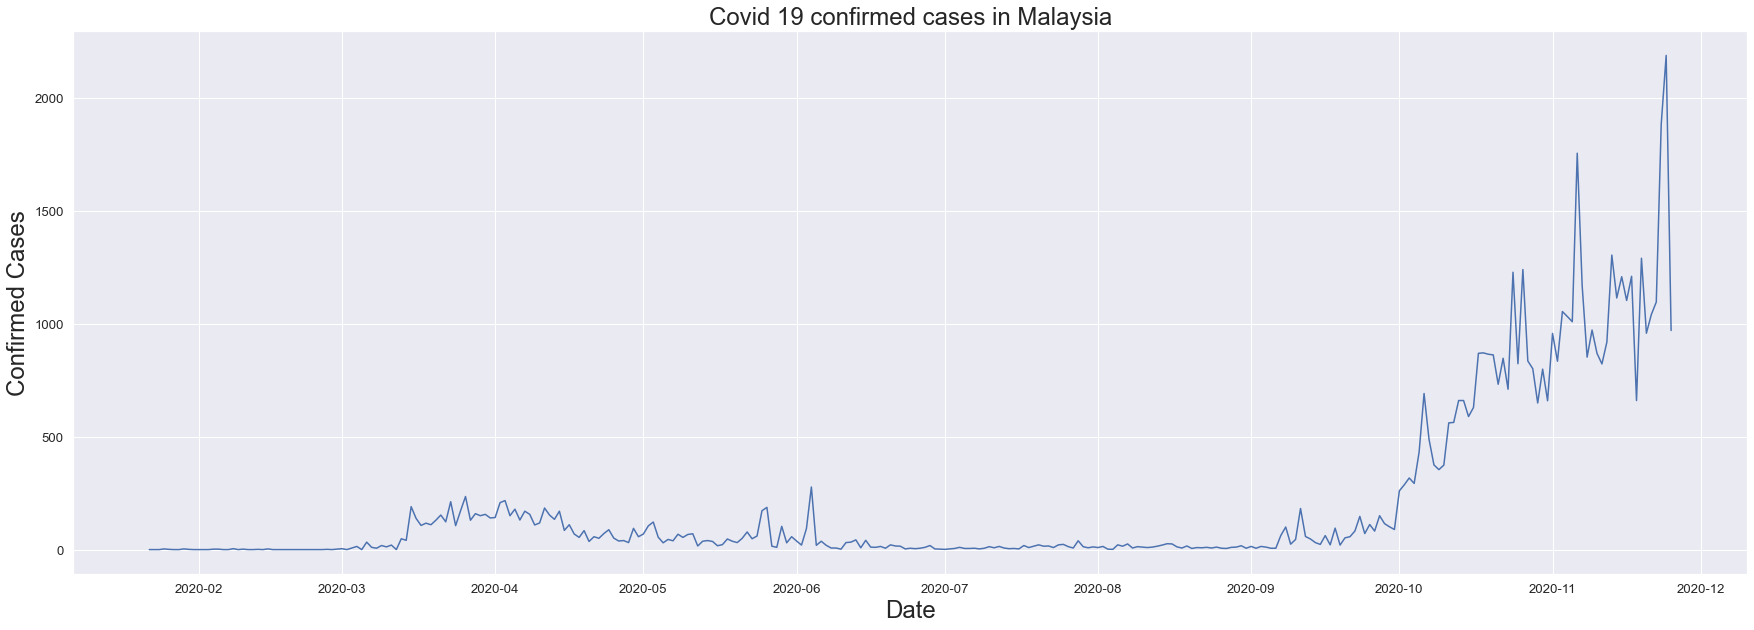

In [48]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.index,y=df.ConfirmDiff,data=df, estimator=None)
plt.title("Covid 19 confirmed cases in Malaysia", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Confirmed Cases",fontsize=24)
plt.show()

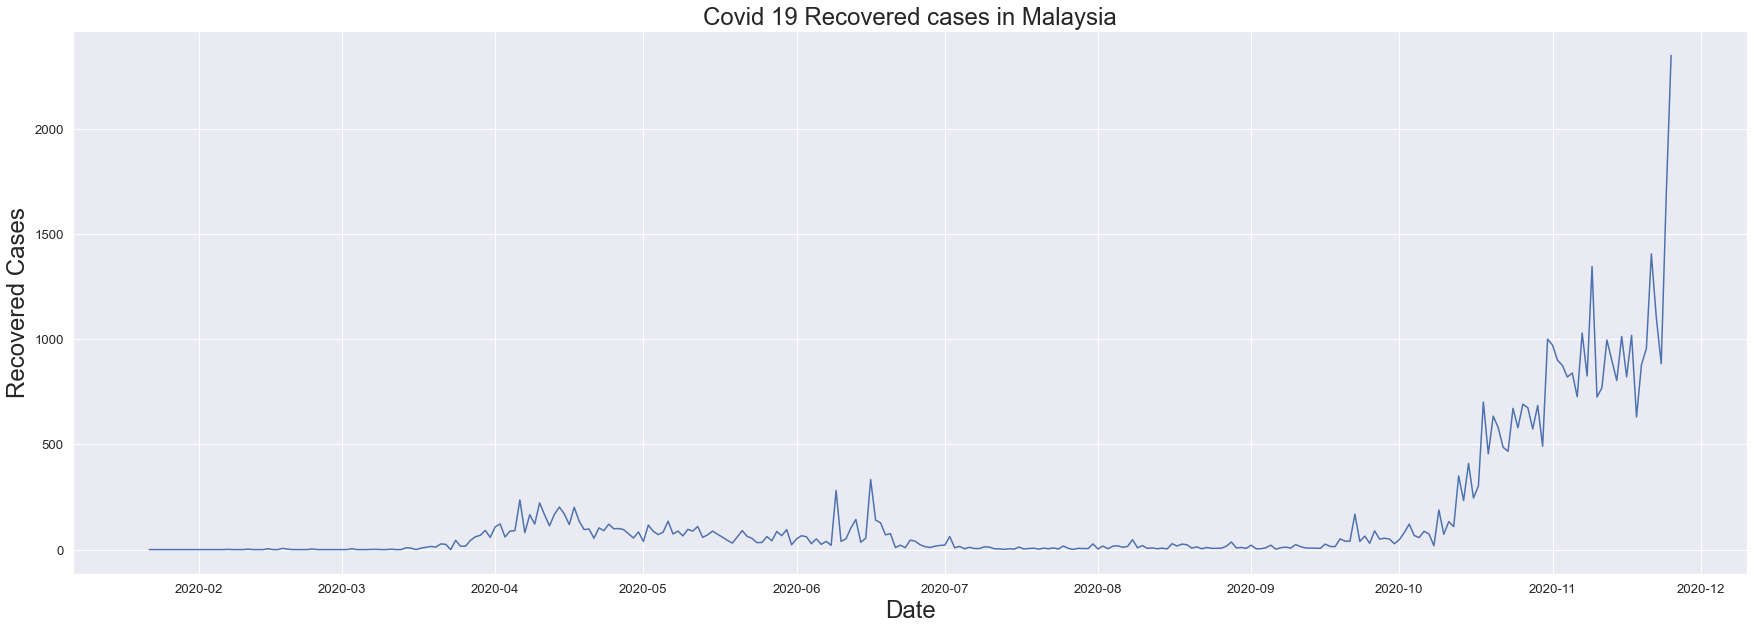

In [49]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.index,y=df.RecoverDiff,data=df, estimator=None)
plt.title("Covid 19 Recovered cases in Malaysia", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Recovered Cases",fontsize=24)
plt.show()

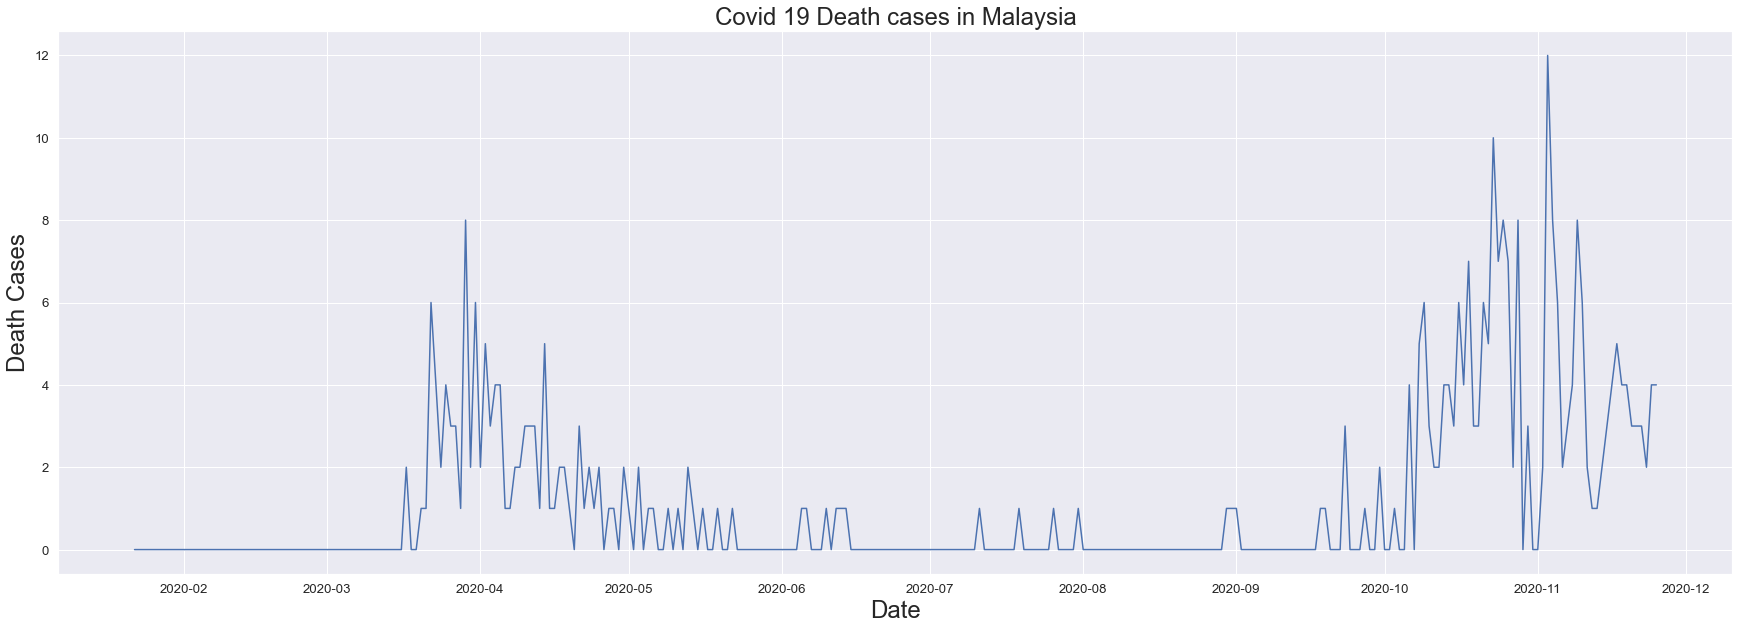

In [50]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.index,y=df.DeathsDiff,data=df, estimator=None)
plt.title("Covid 19 Death cases in Malaysia", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Death Cases",fontsize=24)
plt.show()

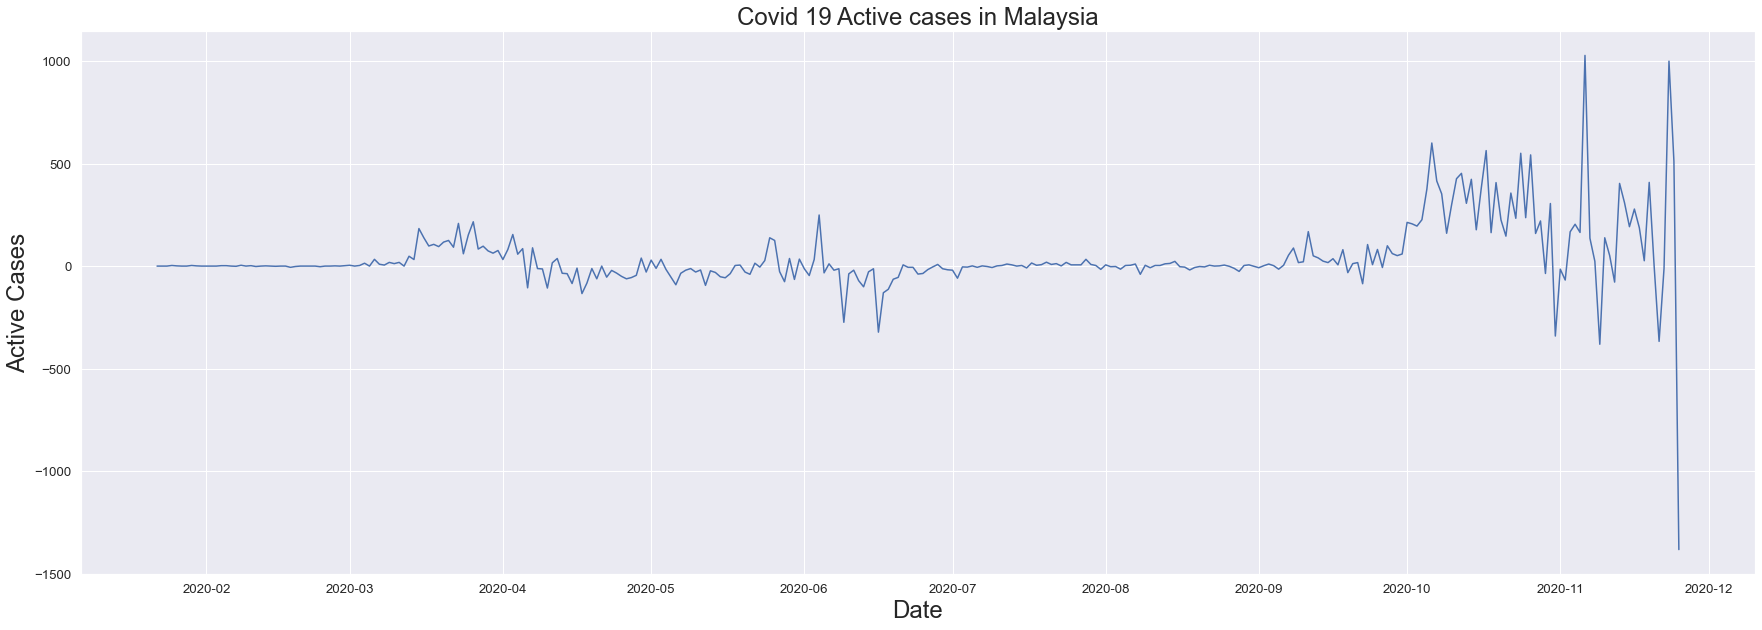

In [51]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.index,y=df.ActiveDiff,data=df, estimator=None)
plt.title("Covid 19 Active cases in Malaysia", fontsize=24)
plt.xlabel("Date",fontsize=24)
plt.ylabel("Active Cases",fontsize=24)
plt.show()

In [52]:
df.columns

Index(['Confirmed', 'Recovered', 'Deaths', 'Active', 'ConfirmDiff', 'DeathsDiff', 'RecoverDiff', 'ActiveDiff', 'Month', 'Day'], dtype='object')

In [53]:
df.drop(['Confirmed', 'Recovered', 'Deaths', 'Active'],axis=1, inplace=True)

In [54]:
df

,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff,Month,Day
Date,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,1,22
2020-01-23,0.0,0.0,0.0,0.0,1,23
2020-01-24,0.0,0.0,0.0,0.0,1,24
2020-01-25,3.0,0.0,0.0,3.0,1,25
2020-01-26,1.0,0.0,0.0,1.0,1,26
...,...,...,...,...,...,...
2020-11-21,1041.0,3.0,1405.0,-367.0,11,21
2020-11-22,1096.0,3.0,1104.0,-11.0,11,22
2020-11-23,1884.0,2.0,883.0,999.0,11,23


In [55]:
df2 = df.groupby("Month")["ConfirmDiff","DeathsDiff","RecoverDiff","ActiveDiff"].sum()
df2

,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff
Month,,,,
1,8.0,0.0,0.0,8.0
2,17.0,0.0,18.0,-1.0
3,2741.0,43.0,519.0,2179.0
4,3236.0,59.0,3634.0,-457.0
5,1817.0,13.0,2182.0,-378.0
6,820.0,6.0,2001.0,-1187.0
7,337.0,4.0,290.0,43.0
8,364.0,2.0,410.0,-48.0
9,1884.0,9.0,913.0,962.0


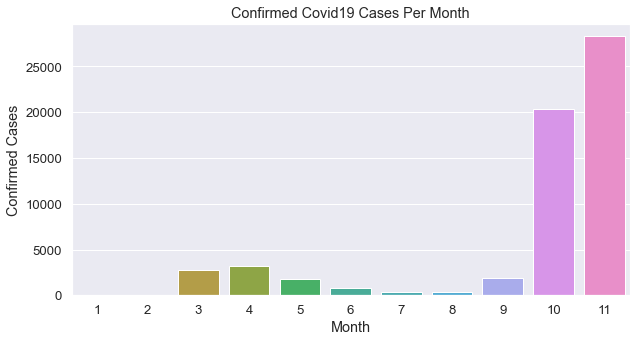

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x=df2.index,y=df2.ConfirmDiff, data=df2, ci=None, estimator=sum)
plt.title("Confirmed Covid19 Cases Per Month")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.show()

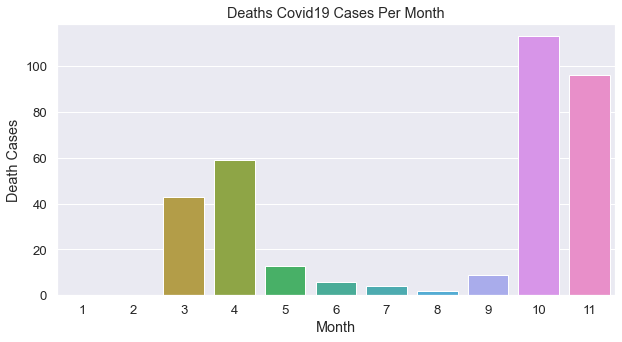

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x=df2.index,y=df2.DeathsDiff, data=df2, ci=None, estimator=sum)
plt.title("Deaths Covid19 Cases Per Month")
plt.xlabel("Month")
plt.ylabel("Death Cases")
plt.show()

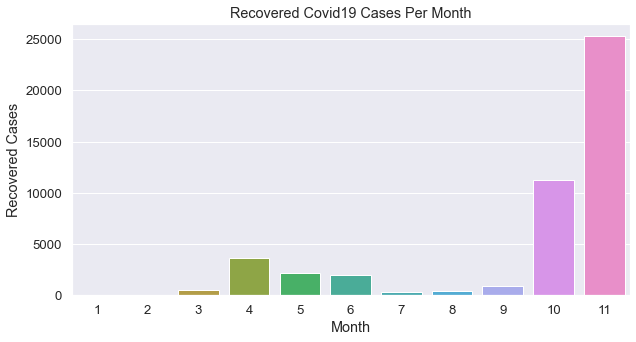

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x=df2.index,y=df2.RecoverDiff, data=df2, ci=None, estimator=sum)
plt.title("Recovered Covid19 Cases Per Month")
plt.xlabel("Month")
plt.ylabel("Recovered Cases")
plt.show()

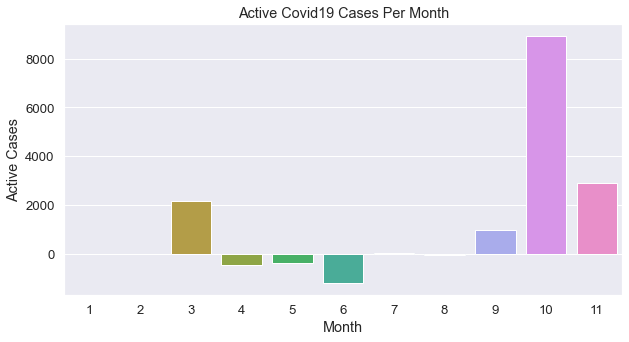

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x=df2.index,y=df2.ActiveDiff, data=df2, ci=None, estimator=sum)
plt.title("Active Covid19 Cases Per Month")
plt.xlabel("Month")
plt.ylabel("Active Cases")
plt.show()

In [60]:
df3 = df.groupby("Day")["ConfirmDiff","DeathsDiff","RecoverDiff","ActiveDiff"].sum()
df3

,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff
Day,,,,
1,1494.0,4.0,1262.0,228.0
2,1477.0,7.0,1368.0,102.0
3,1831.0,18.0,1225.0,588.0
4,1845.0,12.0,1114.0,719.0
5,1703.0,12.0,1163.0,528.0
6,2718.0,9.0,1233.0,1476.0
7,1988.0,4.0,1327.0,657.0
8,1578.0,11.0,1182.0,385.0
9,1557.0,17.0,2029.0,-489.0


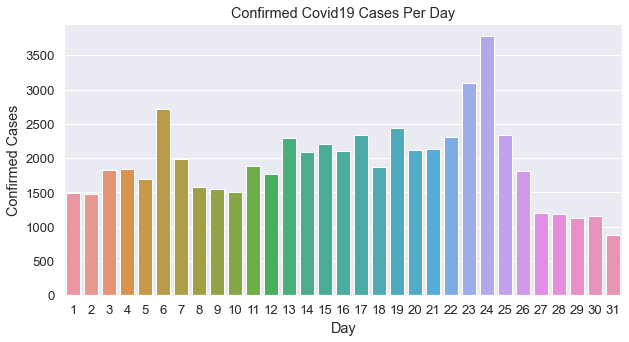

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x=df3.index,y=df3.ConfirmDiff, data=df3, ci=None, estimator=sum)
plt.title("Confirmed Covid19 Cases Per Day")
plt.xlabel("Day")
plt.ylabel("Confirmed Cases")
plt.show()

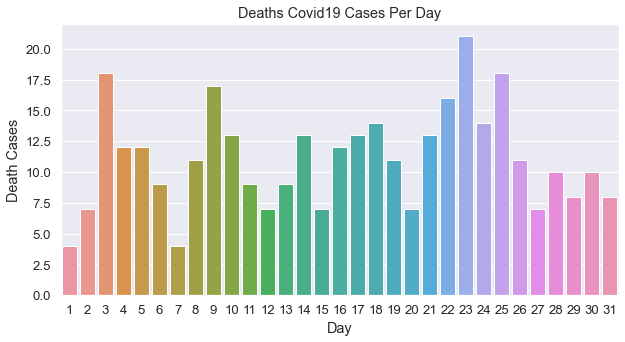

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x=df3.index,y=df3.DeathsDiff, data=df3, ci=None, estimator=sum)
plt.title("Deaths Covid19 Cases Per Day")
plt.xlabel("Day")
plt.ylabel("Death Cases")
plt.show()

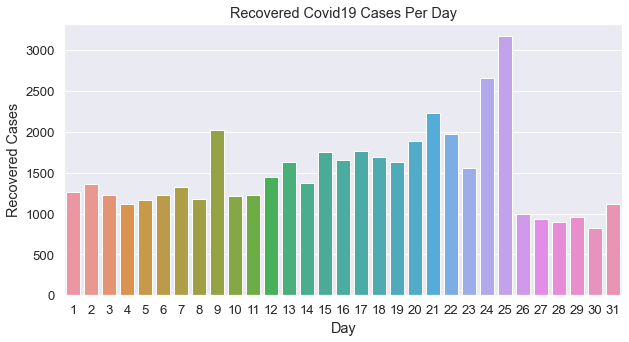

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(x=df3.index,y=df3.RecoverDiff, data=df3, ci=None, estimator=sum)
plt.title("Recovered Covid19 Cases Per Day")
plt.xlabel("Day")
plt.ylabel("Recovered Cases")
plt.show()

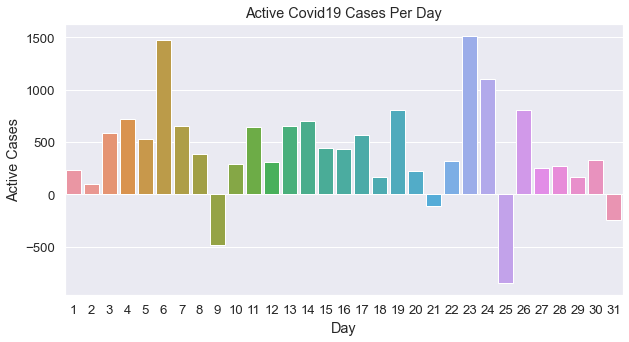

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x=df3.index,y=df3.ActiveDiff, data=df3, ci=None, estimator=sum)
plt.title("Active Covid19 Cases Per Day")
plt.xlabel("Day")
plt.ylabel("Active Cases")
plt.show()

In [65]:
df.head()

,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff,Month,Day
Date,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,1,22
2020-01-23,0.0,0.0,0.0,0.0,1,23
2020-01-24,0.0,0.0,0.0,0.0,1,24
2020-01-25,3.0,0.0,0.0,3.0,1,25
2020-01-26,1.0,0.0,0.0,1.0,1,26


### Correlation

In [66]:
df.corr()

,ConfirmDiff,DeathsDiff,RecoverDiff,ActiveDiff,Month,Day
ConfirmDiff,1.000000,0.641523,0.875959,0.517088,0.604269,0.002108
DeathsDiff,0.641523,1.000000,0.561145,0.326380,0.341420,0.035592
RecoverDiff,0.875959,0.561145,1.000000,0.040080,0.545945,0.027499
ActiveDiff,0.517088,0.326380,0.040080,1.000000,0.283484,-0.044819
Month,0.604269,0.341420,0.545945,0.283484,1.000000,-0.098535
Day,0.002108,0.035592,0.027499,-0.044819,-0.098535,1.000000


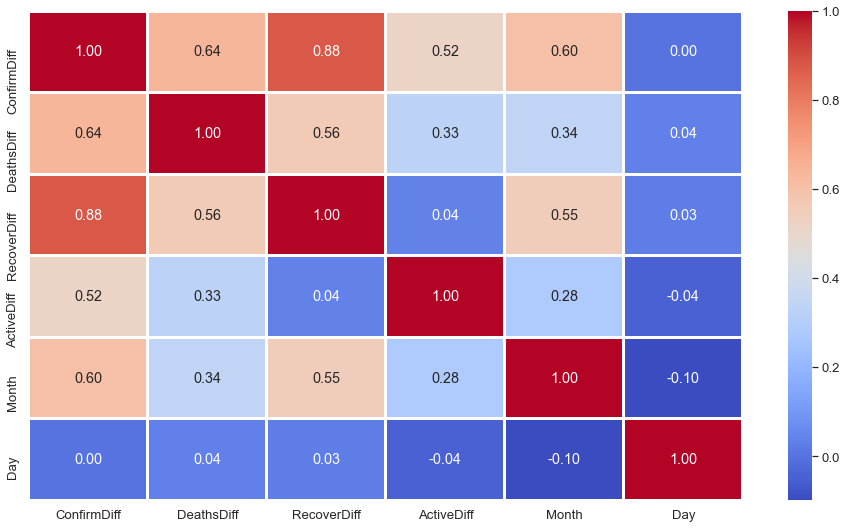

In [67]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()